### predict weight gained using calories consumed Using Statsmodels 

#### Importing Libearies 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import statsmodels.formula.api as smf 
import matplotlib.pyplot as plt 

#### Importing Dataset 

In [2]:
data = pd.read_csv('F://Data_Set/calories_consumed.csv') 

In [3]:
data.head() 

,Weight_gained,Calories_Consumed
0,108,1500
1,200,2300
2,900,3400
3,200,2200
4,300,2500


Check any Null Value is Present in Dataset or Not 

In [4]:
data.isnull().sum() 

Weight_gained        0
Calories_Consumed    0
dtype: int64

Check any Outlier is Present in Dataset or Not 

Box Plot of Weight_gained column 

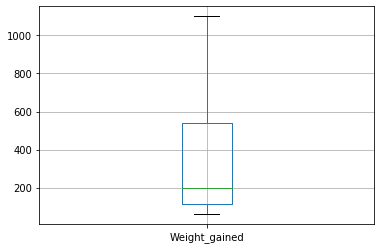

In [5]:
data.boxplot(column='Weight_gained') 

Box plot of Calries Consumed 

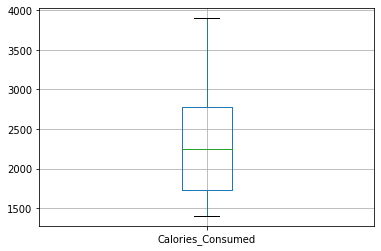

In [6]:
data.boxplot(column='Calories_Consumed') 

Check Dataset information 

In [7]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Weight_gained      14 non-null     int64
 1   Calories_Consumed  14 non-null     int64
dtypes: int64(2)
memory usage: 352.0 bytes


chck Shape of the dataset 

In [8]:
data.shape 

(14, 2)

### 1st Model Genration 

In [9]:
dataset_1 = data 

#### Visualzation of Data Using Distplot 

Dist Plot of Weight_gained 

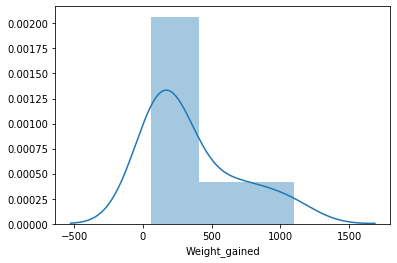

In [10]:
sns.distplot(dataset_1['Weight_gained']) 

Dist Plot of Calries Consumed 

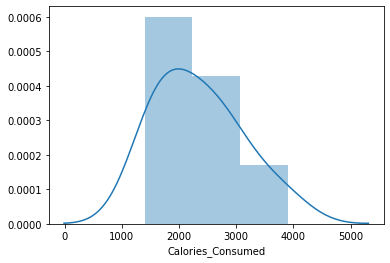

In [11]:
sns.distplot(dataset_1['Calories_Consumed']) 

#### Fitting 1st Simple Linear Regression Model 

In [12]:
model_1 = smf.ols('Weight_gained~Calories_Consumed',data= dataset_1).fit() 

Regression Plot 

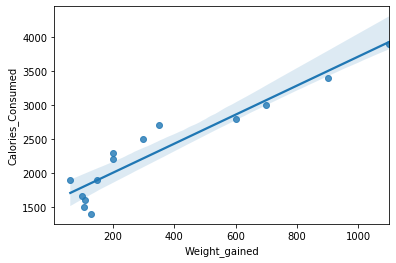

In [13]:
sns.regplot(x='Weight_gained',y='Calories_Consumed',data=dataset_1) 

Test for Normality of Residuals (Q-Q Plot) of 1st Model

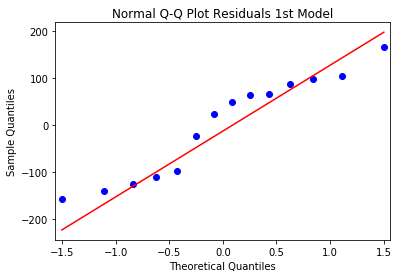

In [13]:
import statsmodels.api as sm 
qqplot = sm.qqplot(model_1.resid,line='q') 
plt.title('Normal Q-Q Plot Residuals 1st Model')
plt.show() 

Sumary of 1st Model 

In [18]:
model_1.summary() 

C:\Users\Nakul Raje\anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Weight_gained   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     104.3
Date:                Fri, 25 Dec 2020   Prob (F-statistic):           2.86e-07
Time:                        20:18:41   Log-Likelihood:                -84.792
No. Observations:                  14   AIC:                             173.6
Df Residuals:                      12   BIC:                             174.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          -625.7524    100.823     -6.206      0.000    -845.427    -406.078
Calories_Consumed     0.4202      0.041     10.211      0.000       0.331       0.510
==============================================================================
Omnibus:                        3.394   Durbin-Watson:                   2.537
Prob(Omnibus):                  0.183   Jarque-Bera (JB):                1.227
Skew:                          -0.203   Prob(JB):                        0.541
Kurtosis:                       1.608   Cond. No.                     8.28e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Predict the New Data Point in 1st Model 

In [19]:
New_data = pd.Series([1700,3200,1500,1000,1900])

In [20]:
New_data 

0    1700
1    3200
2    1500
3    1000
4    1900
dtype: int64

In [25]:
data_pred_1 = pd.DataFrame(New_data,columns=['Calories_Consumed']) 

In [26]:
data_pred_1 

,Calories_Consumed
0,1700
1,3200
2,1500
3,1000
4,1900


Prediction of 1st Model 

In [27]:
y1_pred = model_1.predict(data_pred_1) 

In [28]:
y1_pred 

0     88.513926
1    718.748881
2      4.482599
3   -205.595719
4    172.545254
dtype: float64

### 2nd Model Genration by Using Log Transformation of Data 

In [14]:
dataset_2 = data 

Log Transformation of Data 

In [15]:
dataset_2['Weight_gained'] = np.log(dataset_2['Weight_gained']) 

dataset_2['Calories_Consumed'] = np.log(dataset_2['Calories_Consumed']) 

#### Visualization of Log Transformed Data 

Visualization of Log Transformed weight gained Column 

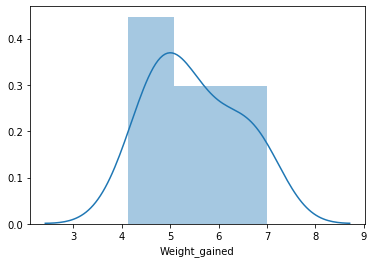

In [32]:
sns.distplot(dataset_2['Weight_gained']) 

Visualization Log Transformed Calries Consumed Column 

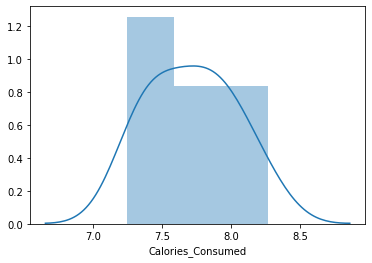

In [33]:
sns.distplot(dataset_2['Calories_Consumed']) 

#### Fitting 2nd Linear Regression Model on Log Transformed Data 

In [16]:
model_2 = smf.ols('Weight_gained~Calories_Consumed',data=dataset_2).fit()  

Test for Normality of Residuals (Q-Q Plot) of 2nd Model

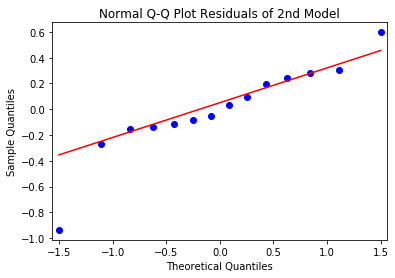

In [17]:
import statsmodels.api as sm 
qqplot = sm.qqplot(model_2.resid,line='q') 
plt.title('Normal Q-Q Plot Residuals of 2nd Model')
plt.show() 

Summary of 2nd Model 

In [38]:
model_2.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Weight_gained   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     66.17
Date:                Fri, 25 Dec 2020   Prob (F-statistic):           3.17e-06
Time:                        22:36:21   Log-Likelihood:                -4.9095
No. Observations:                  14   AIC:                             13.82
Df Residuals:                      12   BIC:                             15.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -14.9275      2.512     -5.942      0.000     -20.401      -9.454
Calories_Consumed     2.6479      0.326      8.135      0.000       1.939       3.357
==============================================================================
Omnibus:                        7.694   Durbin-Watson:                   3.072
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                4.028
Skew:                          -0.991   Prob(JB):                        0.133
Kurtosis:                       4.726   Cond. No.                         199.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3rd Model Genration by Using Normalization of Data 

In [18]:
dataset_3 = data 

Normalization of Data 

In [19]:
from sklearn.preprocessing import Normalizer 

In [20]:
array_3 = dataset_3.values 

In [21]:
x3 = array_3[:,0:2] 

In [22]:
scaler3 = Normalizer().fit(x3)  

In [23]:
normalizedx3 = scaler3.transform(x3) 

In [24]:
array_3 = normalizedx3

In [25]:
data3 = pd.DataFrame(array_3,columns=['Weight_gained','Calories_Consumed']) 

#### Visualization of Normalized Data 

Visualization of Weight gain Column 

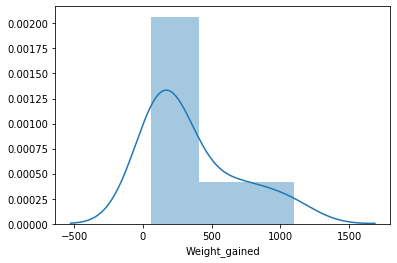

In [27]:
sns.distplot(dataset_3['Weight_gained']) 

Visualization of Normalized Calries Consumed Column

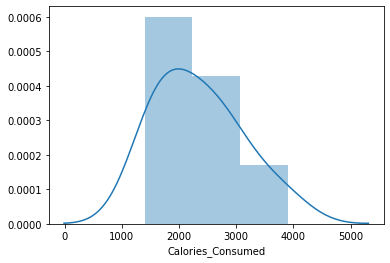

In [28]:
sns.distplot(dataset_3['Calories_Consumed']) 

#### Fitting 3rd Simple Linear regression Model On Normalized Data 

In [26]:
model_3 = smf.ols('Weight_gained~Calories_Consumed',data=data3).fit()  

Test for Normality of Residuals (Q-Q Plot) of 3rd Model

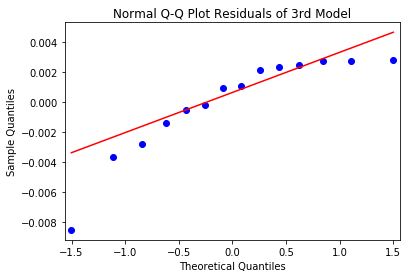

In [27]:
import statsmodels.api as sm 
qqplot = sm.qqplot(model_3.resid,line='q') 
plt.title('Normal Q-Q Plot Residuals of 3rd Model') 
plt.show() 

Summary of 3rd Model 

In [51]:
model_3.summary() 

C:\Users\Nakul Raje\anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Weight_gained   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     2721.
Date:                Fri, 25 Dec 2020   Prob (F-statistic):           1.62e-15
Time:                        22:52:52   Log-Likelihood:                 60.844
No. Observations:                  14   AIC:                            -117.7
Df Residuals:                      12   BIC:                            -116.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.7296      0.022     78.116      0.000       1.681       1.778
Calories_Consumed    -1.4147      0.027    -52.163      0.000      -1.474      -1.356
==============================================================================
Omnibus:                        9.419   Durbin-Watson:                   2.148
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                5.479
Skew:                          -1.385   Prob(JB):                       0.0646
Kurtosis:                       4.313   Cond. No.                         49.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""